#### Task 1.

1. Define the optimization problem, give it a description "Radiation Therapy Optimization" and store it in prob.
2. Define the 8-by-1 optimization variable for the intensities of each beamlet and include a lowerbound of zero. Store the variables in an optimization variable vector I.

In [ ]:
prob = optimproblem("Description","Radiation Therapy Optimization")
I = optimvar("I",8,"LowerBound",0)

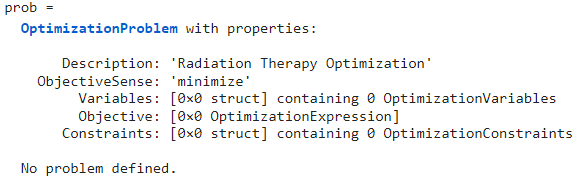

#### Task 2.

The cell response to radiation is represented by the numbers in the grid. The dose delivered to any cell in the grid is computed by multiplying the cell response and the intensity of the beamlet passing through the cell.

You just saw that adding the numbers in the light or blue cells give the total healthy cell response for each of the rows in the grid. These are the rows impacted by beamlets 1-4. Now you must do the same for each of the columns, which are impacted by beamlets 5-8.

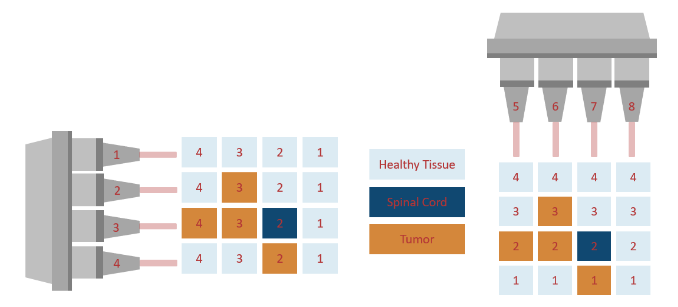

Compute the total radiation dose delivered to the healthy tissue and the spinal cord following the steps below:

1. Store the total cell response for the healthy tissue and spinal cord cells in a 1-by-8 array d, The first four elements should correspond to the cell response of the rows as shown below. The last four elements correspond to the cell response of the columns. These are obtained by adding the numbers in the light and dark blue cells down each column. Use the image under Task 2 in the live script for reference. 

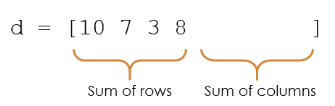

2. Multiply the cell responses d by the radiation intensities I to obtain the total radiation dose delivered. Store the result in a variable D.

In [ ]:
d = [10 7 3 8 8 5 9 10];
D = d*I;

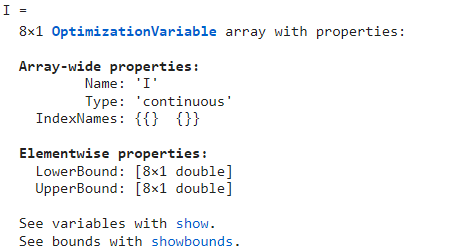

#### Task 3.

The objective function is the sum of all of the doses delivered to the healthy tissue and spinal cord.

Because you defined the radiation intensities as an 8-by-1 column vector and the cell responses as a 1-by-8 row vector, the sum was performed for you during the matrix multiplication.

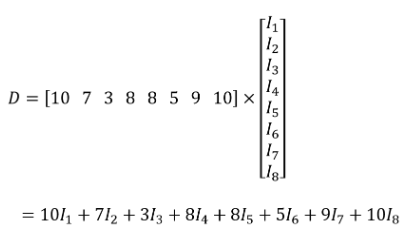

Store the total radiation dose D in the Objective field of your optimization problem.

In [ ]:
prob.Objective = D

#### Task 4.

The spinal cord should not receive a dose of more than 5 units. This translates to the constraint: 2$I_{3}$ + 2$I_{7}$ ≤ 5, where $I_{3}$ and $I_{7}$, are the intensities of the third and seventh beamlets, respectively.

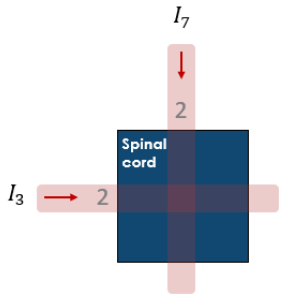

Store this inequality constraint in your optimization problem. Give the constraint the name _spinal_.

In [ ]:
prob.Constraints.spinal = 2*I(3)+2*I(7) <= 5;

#### Task 5.

Every tumor cell needs to receive a sufficiently lethal dose of at least 7 units. Since there are four tumor cells containing cancerous material, this corresponds to four inequality constraints as indicated below.

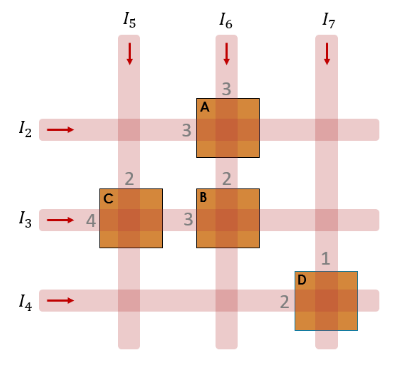

Whenever two beamlets intersect on an orange tumor cell, a constraint must be defined. Each constraint is imposed on the sum of the products of the intersecting beams and the dosage, which is represented by the numbers adjacent to each tumor cell.
The constraints are:

A: 3$I_{2}$ + 3$I_{6}$ ≥ 7
B: 3$I_{3}$ + 2$I_{6}$ ≥ 7
C: 4$I_{3}$ + 2$I_{5}$ ≥ 7
D: 2$I_{4}$ + $I_{7}$ ≥ 7

Store each of the constraints listed above in your optimization problem. Give the constraints names _A_, _B_, _C_, and _D_.

In [ ]:
prob.Constraints.A = 3*I(2)+3*I(6) >= 7;
prob.Constraints.B = 3*I(3)+2*I(6) >= 7;
prob.Constraints.C = 4*I(3)+2*I(5) >= 7;
prob.Constraints.D = 2*I(4)+I(7) >= 7;

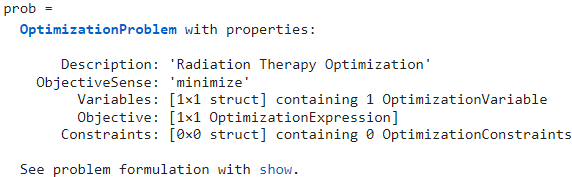

#### Task 6.

Solve the optimization problem. This time, only include a single output and name it _sol_. Remember, since this is a linear objective function you do not need to include an initial guess.

In [ ]:
sol = solve(prob)

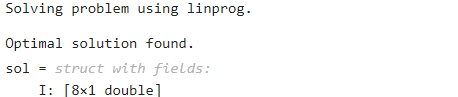

#### Task 7.

Create a bar graph of the optimal beamlet intensities stored in _sol_.

In [ ]:
bar(sol.I)

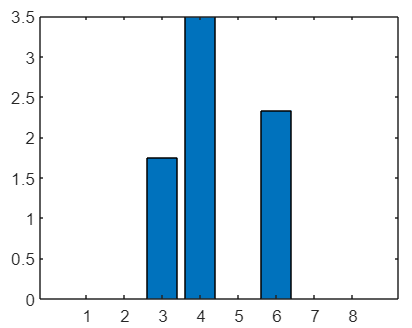

#### Task 8.

Evaluate the dose delivered to the spinal cord at the optimal solution:

1. Define an optimization expression for the dose delivered to the spinal cord. Note that you can use the same expression from Task 4.
2. Check to see if the optimal solution satisfied the constraint _spinal_. Store the result in a variable named _check_. You may want to leave off the semi-colon to display the result.

In [ ]:
spinalCordDose = 2*I(3) + 2*I(7)
check = evaluate(spinalCordDose,sol)

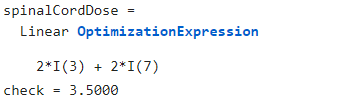